In [160]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM

In [7]:
from google.colab import files
uploaded = files.upload()

Saving eda_data.csv to eda_data.csv


In [76]:
df = pd.read_csv('eda_data.csv')
df.shape

(18234, 31)

In [103]:
df.head()

,datetime,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,conditions,description,icon,stations,clear-day,cloudy,fog,partly-cloudy-day,rain_icon,wind
0,1970-01-01,California,52.7,29.5,37.5,52.7,29.5,37.0,29.7,74.3,...,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"74516023202,99999923232,72483623208,72483793216",0,0,0,1,0,0
1,1970-01-02,California,53.5,27.4,38.2,53.5,27.4,38.0,29.1,70.8,...,Clear,Clear conditions throughout the day.,clear-day,"74516023202,99999923232,72483623208,72483793216",1,0,0,0,0,0
2,1970-01-03,California,52.4,27.5,38.5,52.4,27.5,37.8,27.7,66.3,...,Clear,Clear conditions throughout the day.,clear-day,"74516023202,99999923232,72483623208,72483793216",1,0,0,0,0,0
3,1970-01-04,California,50.3,27.4,36.9,50.3,26.4,34.8,27.5,69.6,...,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"74516023202,99999923232,72483623208,72483793216",0,0,0,1,0,0
4,1970-01-05,California,48.5,27.2,36.4,48.5,24.4,35.5,27.9,71.8,...,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"74516023202,99999923232,72483623208,72483793216",0,0,0,1,0,0


In [104]:
df.isnull().sum()

datetime             0
name                 0
tempmax              0
tempmin              0
temp                 0
feelslikemax         0
feelslikemin         0
feelslike            0
dew                  0
humidity             0
precip               0
precipprob           0
precipcover          0
windspeed            0
winddir              0
sealevelpressure     0
cloudcover           0
visibility           0
sunrise              0
sunset               0
moonphase            0
conditions           0
description          0
icon                 0
stations             0
clear-day            0
cloudy               0
fog                  0
partly-cloudy-day    0
rain_icon            0
wind                 0
dtype: int64

In [77]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [78]:
df.set_index('datetime', inplace = True)
df.sort_index(inplace = True)

df.head()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,conditions,description,icon,stations,clear-day,cloudy,fog,partly-cloudy-day,rain_icon,wind
datetime,,,,,,,,,,,,,,,,,,,,,
1970-01-01,California,52.7,29.5,37.5,52.7,29.5,37.0,29.7,74.3,0.0,...,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"74516023202,99999923232,72483623208,72483793216",0,0,0,1,0,0
1970-01-02,California,53.5,27.4,38.2,53.5,27.4,38.0,29.1,70.8,0.0,...,Clear,Clear conditions throughout the day.,clear-day,"74516023202,99999923232,72483623208,72483793216",1,0,0,0,0,0
1970-01-03,California,52.4,27.5,38.5,52.4,27.5,37.8,27.7,66.3,0.0,...,Clear,Clear conditions throughout the day.,clear-day,"74516023202,99999923232,72483623208,72483793216",1,0,0,0,0,0
1970-01-04,California,50.3,27.4,36.9,50.3,26.4,34.8,27.5,69.6,0.0,...,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"74516023202,99999923232,72483623208,72483793216",0,0,0,1,0,0
1970-01-05,California,48.5,27.2,36.4,48.5,24.4,35.5,27.9,71.8,0.0,...,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"74516023202,99999923232,72483623208,72483793216",0,0,0,1,0,0


In [79]:
features = df.drop(columns = ['precip', 'name', 'precipprob', 'precipcover', 'sunrise', 'sunset', 'conditions', 'description', 'icon', 'stations'], axis=1)
X = features
y = df['precip']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False, test_size=0.005)

In [150]:
X_train.tail()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase,clear-day,cloudy,fog,partly-cloudy-day,rain_icon,wind
datetime,,,,,,,,,,,,,,,,,,,,
2021-09-27,79.5,55.6,65.6,79.5,55.6,65.6,55.4,72.2,18.2,201.8,1015.3,33.7,9.9,0.72,0,0,0,1,0,0
2021-09-28,79.8,55.4,65.7,79.8,55.4,65.7,37.1,40.3,21.2,321.1,1015.5,8.0,9.9,0.75,1,0,0,0,0,0
2021-09-29,84.7,47.8,65.2,81.6,47.8,64.7,36.7,39.8,13.0,321.7,1014.3,4.0,9.9,0.78,1,0,0,0,0,0
2021-09-30,86.6,49.5,66.4,83.1,49.5,65.7,39.8,45.0,5.6,56.5,1014.9,0.3,9.9,0.82,1,0,0,0,0,0
2021-10-01,88.2,52.6,69.3,84.5,52.6,68.5,41.1,40.2,5.0,6.1,1014.3,3.5,9.9,0.85,1,0,0,0,0,0


In [151]:
X_test.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase,clear-day,cloudy,fog,partly-cloudy-day,rain_icon,wind
datetime,,,,,,,,,,,,,,,,,,,,
2021-10-02,90.0,54.0,70.4,85.9,54.0,69.4,43.0,42.9,5.6,310.6,1014.9,3.0,9.9,0.88,1,0,0,0,0,0
2021-10-03,88.3,55.5,69.8,84.6,55.5,69.0,44.1,44.2,4.9,329.0,1013.7,5.3,9.9,0.91,1,0,0,0,0,0
2021-10-04,88.4,53.5,69.6,84.9,53.5,68.9,44.3,44.2,5.2,187.7,1011.7,4.0,9.4,0.95,1,0,0,0,0,0
2021-10-05,82.6,58.9,68.1,80.5,58.9,67.9,44.2,44.5,15.3,186.9,1012.1,12.7,9.9,0.98,1,0,0,0,0,0
2021-10-06,74.6,56.9,63.3,74.6,56.9,63.3,49.6,64.5,17.4,195.9,1014.1,18.4,9.9,0.00,1,0,0,0,0,0


In [152]:
X_train.shape, X_test.shape

((18142, 20), (92, 20))

In [153]:
y_train.shape, y_test.shape

((18142,), (92,))

In [154]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [155]:
train_sequences = TimeseriesGenerator(X_train_sc, y_train, length = 3,
                                      batch_size = 64)

In [156]:
test_sequences = TimeseriesGenerator(X_test_sc, y_test, length = 3, batch_size = 64)

In [157]:
input_shape = train_sequences[0][0][0].shape

In [158]:
model = Sequential()

model.add(GRU(16, input_shape = input_shape, return_sequences = True)) # True when next layer is also RNN
model.add(GRU(32, return_sequences = False)) # False is next layer is Dense/Not RNN
model.add(Dense(16, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(1, activation = None))


In [159]:
model.compile(loss = 'mean_squared_error',
              optimizer = 'adam')

es = EarlyStopping(patience = 5)

history = model.fit(train_sequences,
                    validation_data = test_sequences,
                    callbacks = [es],
                    epochs = 50)

Epoch 1/50
284/284 [==============================] - 11s 22ms/step - loss: 0.1432 - val_loss: 0.3888
Epoch 2/50
284/284 [==============================] - 4s 15ms/step - loss: 0.0524 - val_loss: 0.3648
Epoch 3/50
284/284 [==============================] - 4s 15ms/step - loss: 0.0429 - val_loss: 0.3553
Epoch 4/50
284/284 [==============================] - 2s 8ms/step - loss: 0.0418 - val_loss: 0.3489
Epoch 5/50
284/284 [==============================] - 2s 8ms/step - loss: 0.0413 - val_loss: 0.3457
Epoch 6/50
284/284 [==============================] - 2s 8ms/step - loss: 0.0410 - val_loss: 0.3580
Epoch 7/50
284/284 [==============================] - 2s 8ms/step - loss: 0.0411 - val_loss: 0.3452
Epoch 8/50
284/284 [==============================] - 3s 11ms/step - loss: 0.0407 - val_loss: 0.3394
Epoch 9/50
284/284 [==============================] - 3s 9ms/step - loss: 0.0401 - val_loss: 0.3418
Epoch 10/50
284/284 [==============================] - 3s 9ms/step - loss: 0.0403 - val_loss: 0

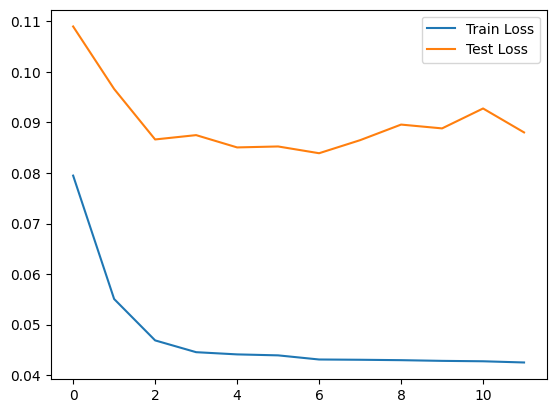

In [129]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend()

In [ ]:
# Figuring out predictions and graphing next year

In [111]:
model.evaluate(test_sequences)

1/1 [==============================] - 0s 44ms/step - loss: 0.0538 - mse: 0.0533


[0.053827036172151566, 0.05331014469265938]

In [130]:
preds = model.predict(test_sequences)

1/1 [==============================] - 1s 1s/step


In [113]:
len(preds)

7

In [132]:
preds_p = pd.Series(index= y_test.index[:-3], data= preds.reshape(89))

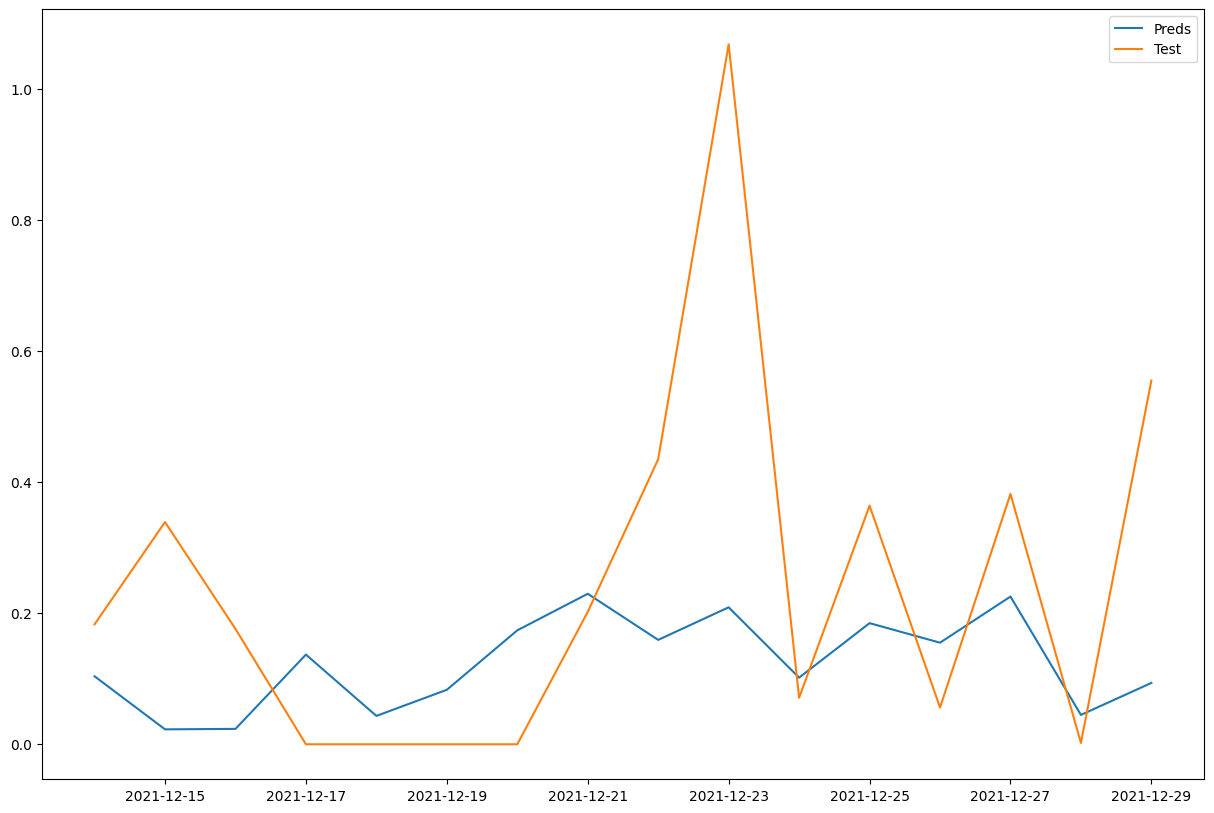

In [133]:

plt.figure(figsize=(15,10))
plt.plot(preds_p, label = 'Preds')
plt.plot(y_test[:-3], label = 'Test')
plt.legend(loc='best')
plt.show()

In [102]:
from sklearn.metrics import r2_score, mean_squared_error

In [116]:
mean_squared_error(y_test[:-3], preds, squared=False)

0.3552128796347057

In [134]:
r2_score(y_test[:-3], preds)

-0.04700505581741221

In [11]:
# RNN Model with smaller region

In [1]:
from google.colab import files
uploaded = files.upload()

Saving fresno_eda.csv to fresno_eda.csv


In [161]:
fresno = pd.read_csv('fresno_eda.csv')

In [162]:
fresno.shape

(10959, 31)

In [163]:
fresno.isnull().sum()

datetime             0
name                 0
tempmax              0
tempmin              0
temp                 0
feelslikemax         0
feelslikemin         0
feelslike            0
dew                  0
humidity             0
precip               0
precipprob           0
precipcover          0
windspeed            0
winddir              0
sealevelpressure     0
cloudcover           0
visibility           0
sunrise              0
sunset               0
moonphase            0
conditions           0
description          0
icon                 0
stations             0
clear-day            0
cloudy               0
fog                  0
partly-cloudy-day    0
rain_icon            0
wind                 0
dtype: int64

In [164]:
fresno['datetime'] = pd.to_datetime(fresno['datetime'])
fresno.set_index('datetime', inplace = True)
fresno.sort_index(inplace = True)

fresno.head()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,conditions,description,icon,stations,clear-day,cloudy,fog,partly-cloudy-day,rain_icon,wind
datetime,,,,,,,,,,,,,,,,,,,,,
1992-01-01,Fresno California,57.6,34.1,44.5,57.6,34.1,43.2,40.1,85.6,0.000,...,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"74702023110,72389093193",0,0,0,1,0,0
1992-01-02,Fresno California,46.1,39.9,42.6,44.9,35.5,40.0,41.0,93.8,0.000,...,Overcast,Cloudy skies throughout the day.,fog,"74702023110,72389093193",0,0,1,0,0,0
1992-01-03,Fresno California,52.1,41.2,46.8,52.1,36.8,45.3,43.6,88.8,0.083,...,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"74702023110,72389093193",0,0,0,0,1,0
1992-01-04,Fresno California,59.2,44.1,51.8,59.2,41.2,50.8,45.1,78.8,0.000,...,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"74702023110,72389093193",0,0,0,1,0,0
1992-01-05,Fresno California,56.8,44.9,48.1,56.8,36.6,45.4,43.1,83.7,1.016,...,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"74702023110,72389093193",0,0,0,0,1,0


In [165]:
features = fresno.drop(columns = ['precip', 'name', 'precipprob', 'precipcover', 'sunrise', 'sunset', 'conditions', 'description', 'icon', 'stations'], axis=1)
X_2 = features
y_2 = fresno['precip']

In [166]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, shuffle = False, test_size=0.005)

In [167]:
X_2_train.tail()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase,clear-day,cloudy,fog,partly-cloudy-day,rain_icon,wind
datetime,,,,,,,,,,,,,,,,,,,,
2021-11-03,74.9,52.8,63.5,74.9,52.8,63.5,55.7,78.0,7.8,318.9,1020.3,22.8,7.0,0.96,0,0,0,1,0,0
2021-11-04,72.0,56.3,63.2,72.0,56.3,63.2,54.7,75.0,13.9,314.9,1019.4,32.0,7.0,0.00,0,0,0,1,0,0
2021-11-05,73.0,50.7,60.6,73.0,50.7,60.6,51.2,72.6,7.4,302.4,1017.9,39.2,9.5,0.03,0,0,0,1,0,0
2021-11-06,69.9,49.7,59.6,69.9,49.7,59.6,49.0,69.9,14.2,305.0,1018.8,76.1,9.8,0.07,0,0,0,1,0,0
2021-11-07,65.8,49.2,56.3,65.8,48.2,56.3,44.2,65.8,11.5,305.2,1020.1,63.9,9.9,0.10,0,0,0,1,0,0


In [168]:
X_2_test.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase,clear-day,cloudy,fog,partly-cloudy-day,rain_icon,wind
datetime,,,,,,,,,,,,,,,,,,,,
2021-11-08,64.2,43.5,55.1,64.2,42.2,54.8,42.0,62.6,9.2,153.7,1019.0,65.6,9.6,0.14,0,0,0,0,1,0
2021-11-09,65.2,55.0,58.9,65.2,55.0,58.9,51.9,78.2,12.7,102.8,1022.5,75.3,8.7,0.17,0,0,0,0,1,0
2021-11-10,62.2,48.6,53.9,62.2,48.6,53.9,51.4,91.5,8.2,340.8,1025.6,53.5,5.1,0.21,0,0,0,1,0,0
2021-11-11,63.2,49.5,56.0,63.2,49.5,56.0,51.8,86.4,4.8,102.2,1025.1,61.5,3.8,0.25,0,0,0,1,0,0
2021-11-12,69.1,47.8,57.7,69.1,47.8,57.7,52.5,83.9,5.8,306.4,1023.8,27.6,3.2,0.27,0,0,0,1,0,0


In [169]:
ss = StandardScaler()

X_2_train_sc = ss.fit_transform(X_2_train)
X_2_test_sc = ss.transform(X_2_test)

In [170]:
train_sequences_2 = TimeseriesGenerator(X_2_train_sc, y_2_train, length = 3,
                                      batch_size = 64)

In [171]:
test_sequences_2 = TimeseriesGenerator(X_2_test_sc, y_2_test, length = 3, batch_size = 64)

In [172]:
input_shape_2 = train_sequences_2[0][0][0].shape

In [173]:
model_2 = Sequential()

model_2.add(LSTM(8, input_shape = input_shape_2, return_sequences = True)) # True when next layer is also RNN
model_2.add(LSTM(16, return_sequences = False)) # False is next layer is Dense/Not RNN
model_2.add(Dense(8, activation = 'relu', kernel_regularizer=l2(0.01)))
model_2.add(Dropout(0.4))
model_2.add(Dense(1, activation = None))


In [174]:
model_2.compile(loss = 'mean_squared_error',
              optimizer = 'adam')

es = EarlyStopping(patience = 15)

history_2 = model_2.fit(train_sequences_2,
                    validation_data = test_sequences_2,
                    callbacks = [es],
                    epochs = 50)

Epoch 1/50
171/171 [==============================] - 8s 12ms/step - loss: 0.0894 - val_loss: 0.0718
Epoch 2/50
171/171 [==============================] - 1s 7ms/step - loss: 0.0403 - val_loss: 0.0430
Epoch 3/50
171/171 [==============================] - 2s 10ms/step - loss: 0.0226 - val_loss: 0.0328
Epoch 4/50
171/171 [==============================] - 1s 7ms/step - loss: 0.0173 - val_loss: 0.0303
Epoch 5/50
171/171 [==============================] - 1s 8ms/step - loss: 0.0157 - val_loss: 0.0291
Epoch 6/50
171/171 [==============================] - 1s 7ms/step - loss: 0.0154 - val_loss: 0.0294
Epoch 7/50
171/171 [==============================] - 1s 7ms/step - loss: 0.0150 - val_loss: 0.0282
Epoch 8/50
171/171 [==============================] - 1s 7ms/step - loss: 0.0149 - val_loss: 0.0279
Epoch 9/50
171/171 [==============================] - 1s 7ms/step - loss: 0.0148 - val_loss: 0.0275
Epoch 10/50
171/171 [==============================] - 2s 10ms/step - loss: 0.0147 - val_loss: 0.0

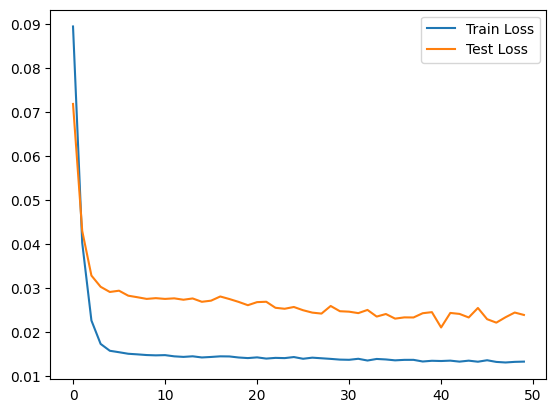

In [175]:
plt.plot(history_2.history['loss'], label = 'Train Loss')
plt.plot(history_2.history['val_loss'], label = 'Test Loss')
plt.legend()

In [176]:
preds_2 = model_2.predict(test_sequences_2)

1/1 [==============================] - 1s 866ms/step


In [177]:
len(preds_2)

52

In [179]:
preds_p_2 = pd.Series(index= y_2_test.index[:-3], data= preds_2.reshape(52))

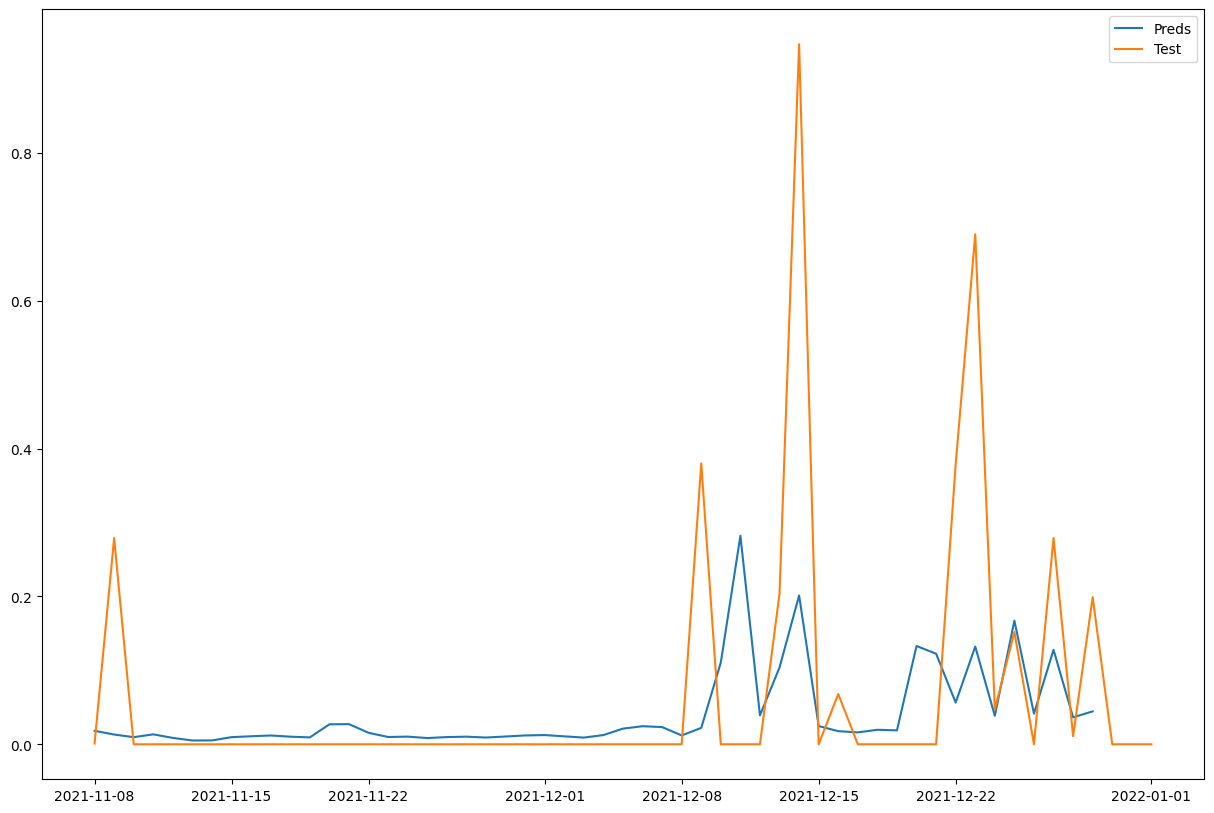

In [180]:

plt.figure(figsize=(15,10))
plt.plot(preds_p_2, label = 'Preds')
plt.plot(y_2_test, label = 'Test')
plt.legend(loc='best')
plt.show()

In [181]:
mean_squared_error(y_2_test[:-3], preds_p_2, squared=False)

0.16205227365915692

In [182]:
r2_score(y_2_test[:-3], preds_p_2)

0.18408603154761227